# Training Models

In this section, I will train models to predict house prices. To stretch out firstly I tried simple OLS Regression both applying a formula and using libraries (statmodels and seaborn).

After that, I tried every model as hand-tuned or with grid search I reported all results after every model. You can see models and frameworks/libraries in the table below.

| Model                                            | Library - Framework |
| :----------------------------------------------- | :-----------------: |
| Multiple Regression                              |    scikit-learn    |
| Polinomial Regression                            |    scikit-learn    |
| Lasso Regression (l1 regularization)             |    scikit-learn    |
| Ridge Regression (l2 regularization)             |    scikit-learn    |
| ElasticNet Regression (l1 and l2 regularization) |    scikit-learn    |
| Support Vector Regression                        |    scikit-learn    |
| Decision Tree                                    |    scikit-learn    |
| Random Forest                                    |    scikit-learn    |
| Ada Boost                                        |    scikit-learn    |
| Gradient Boosting                                |    scikit-learn    |
| eXtreme Gradient Boosting                        |       XGBoost       |
| Neural Network                                   |     TensorFlow     |



### Notebook Structure

**Load Prepare Data**
* **Data prepation - Trains Test Split and Feature Scaling**

**Simple OLS**
* **Custom Calculation**
*  **Calculation with Libraries**

**Regression Models**
* **Multiple Linear Regression Models**
* **Polynomial Regression Model**
* **Grid Search on Linear Regression Models with Regularization**
  *  **Lasso**
  * **Ridge**
  * **ElasticNet**

**Support Vector Regression**
**Tree Based Models**
* **Decision Tree Regressor**
* **Random Forest Regressor**
* **AdaBoost Regressor**
* **Gradient Boosting Regressor**
* **eXtreme Gradient Boosting**

**Neural Network**

**Deploying Models**


### Load & Prepare Data

In models data will used as both scaled and unscaled. To scale data I used standart scaler which calculates every feature Z score with training data set statistics.

##### Data preparation - Trains Test Split and Feature Scaling
I didnt scale as Z scores dummy variables because they already 0-1 normalized. You can see below scaling data decrase test performance because of that on grid search only unsclaed daya used.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import (residual_plots, html_table,
                       reg_score_table, residual_plot)

pd.set_option('float_format', '{:f}'.format)

processed_data_dir = Path('../data/processed/')
file_name = 'train.csv'
file_path = processed_data_dir / file_name
models_trained_dir = Path('../models/trained/')

In [2]:
df = pd.read_csv(file_path)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.000000,8450,7,5,2003,2003,196.000000,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,9600,6,8,1976,1976,0.000000,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.000000,11250,7,5,2001,2002,162.000000,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.000000,9550,7,5,1915,1970,0.000000,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.000000,14260,8,5,2000,2000,350.000000,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [3]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)
print(X_train_scaled.shape)
print(X_train.shape)
print(X_test_scaled.shape)
print(X_test.shape)

(1153, 254)
(1153, 254)
(289, 254)
(289, 254)


### Try simple OLS
In this section I will try Ordinary Least Square Regression with formula and demostrate results differents way.

In [6]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
cont_cols = X.columns[:list(X.columns).index('YrSold') + 1]

##### Custom Calculation

In [7]:
x_ols = df['GrLivArea'].values
y_ols = df['SalePrice'].values
# np.polyfit(x,y,deg=1)
x_mean = x_ols.mean()
y_mean = y_ols.mean()
x_me = x_ols - x_mean
y_me = y_ols - y_mean
x_sme = np.sum(x_me ** 2)
m = np.sum(x_me * y_me) / x_sme
b = y_mean - m * x_mean
print(f'y_hat_i = {np.round(m, decimals=3)}*x_i + {np.round(b, decimals=3)}')

y_hat_i = 97.269*x_i + 31670.473


In [8]:
y_pred = x_ols * m + b
R2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum(y_me ** 2))

print(
    f'GrLivArea describe {np.round(R2, decimals=4) * 100}% of SalePrice\'s varience.')

GrLivArea describe 47.4% of SalePrice's varience.


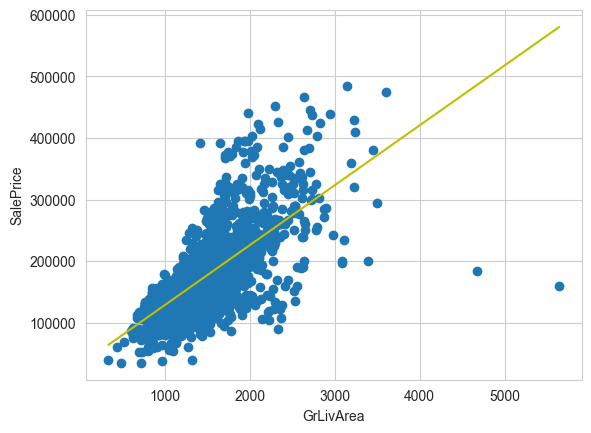

In [9]:
fig, ax = plt.subplots()
line_x = np.array([np.min(x_ols), np.max(x_ols)])
line_y = line_x * m + b
ax.plot(line_x, line_y, color='y')
ax.scatter(x_ols, y_ols)
ax.set_ylabel('SalePrice')
ax.set_xlabel('GrLivArea')
plt.show()

##### Calculation with Libraries

In [10]:
import statsmodels.api as sm

x_ols = sm.add_constant(x_ols)
results = sm.OLS(y_ols, x_ols).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1297.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          4.12e-203
Time:                        20:48:37   Log-Likelihood:                -17704.
No. Observations:                1442   AIC:                         3.541e+04
Df Residuals:                    1440   BIC:                         3.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.167e+04   4285.965      7.389      0.0

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

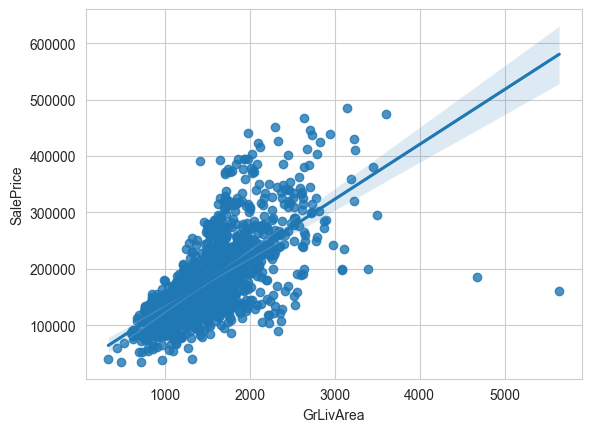

In [11]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df)

## Trainin Performance Purpose Model

### Regression Models

#### Multiple Linear Regression Models

Compare models performance on scaled and normal data.

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

D:\Desktop\ML_projects\HousePricesKaggle\src\utils.py:22: RuntimeWarning: invalid value encountered in log
  np.square(np.log(y_pred + 1) - np.log(y_true + 1))))
D:\Desktop\ML_projects\HousePricesKaggle\src\utils.py:22: RuntimeWarning: invalid value encountered in log
  np.square(np.log(y_pred + 1) - np.log(y_true + 1))))


,Train Regression,Test Regression,Train Regression Scaled,Test Regression Scaled
R2,0.940377,0.615974,0.940377,-255042413573213683712.000000
MAE,12000.640586,18451.556543,12001.268948,64297260554752.484375
MSE,312338591.820168,1798359408.638859,312339947.016520,1194339849369502537382147129344.000000
RMSE,17673.103627,42407.067909,17673.141968,1092858567871205.625000
RMSLE,0.102159,0.147731,0.102169,1.449389


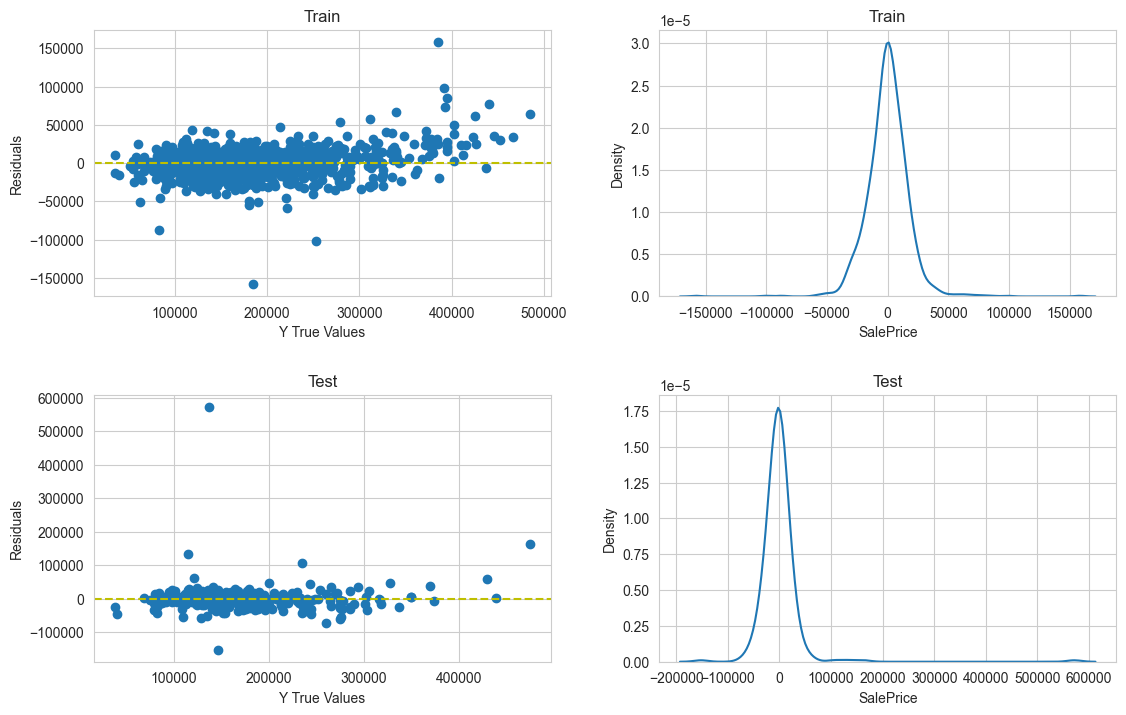

In [13]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_scaled = LinearRegression()
reg_scaled.fit(X_train_scaled, y_train)

reg_scores = reg_score_table(reg, X_train, X_test, y_train, y_test)
reg_scores.columns += ' Regression'
reg_scaled_scores = reg_score_table(reg_scaled, X_train_scaled, X_test_scaled,
                                    y_train, y_test)
reg_scaled_scores.columns += ' Regression Scaled'

scores = pd.concat([reg_scores, reg_scaled_scores], axis=1)
html_table(scores)
residual_plots(reg, X_train, X_test, y_train, y_test)

#### Polynomial Regression Model

In [14]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2)
polynomial_converter.fit(X)
X_poly = polynomial_converter.transform(X)
print('Dataset features shape is: ', X_poly.shape)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=43)

sc_poly = StandardScaler()
sc_poly.fit(X_train_poly)
X_train_poly_scaled = sc_poly.transform(X_train_poly)
X_test_poly_scaled = sc_poly.transform(X_test_poly)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_scaled, y_train_poly)

poly_reg_scores = reg_score_table(poly_reg, X_train_poly_scaled,
                                  X_test_poly_scaled,
                                  y_train_poly,
                                  y_test_poly)
poly_reg_scores.columns += ' Polynomial Regression'
html_table(scores)

Dataset features shape is:  (1442, 32640)


,Train Regression,Test Regression,Train Regression Scaled,Test Regression Scaled
R2,0.940377,0.615974,0.940377,-255042413573213683712.000000
MAE,12000.640586,18451.556543,12001.268948,64297260554752.484375
MSE,312338591.820168,1798359408.638859,312339947.016520,1194339849369502537382147129344.000000
RMSE,17673.103627,42407.067909,17673.141968,1092858567871205.625000
RMSLE,0.102159,0.147731,0.102169,1.449389


#### Grid Search on Linear Regression Models with Regularization

In [15]:

def fit_eval_grid_gen(X_train, X_test, y_train, y_test, **kwargs):
    def fit_eval_grid(model, param_grid, title):
        grid = GridSearchCV(model, param_grid, cv=5,
                            n_jobs=-1, verbose=3, **kwargs)
        grid.fit(X_train, y_train)
        print('\n\rBest params are: ', grid.best_params_, '\n')
        scores = reg_score_table(grid, X_train, X_test, y_train,
                                 y_test)
        scores.columns += f' {title}'
        html_table(scores)
        return grid, scores

    return fit_eval_grid


In [16]:
fit_eval_grid_reg = fit_eval_grid_gen(X_train_scaled, X_test_scaled, y_train,
                                      y_test,
                                      **{'scoring': 'neg_mean_squared_error'})

##### Lasso

In [17]:
lasso_model = Lasso(max_iter=int(1e+4))
lasso_param_grid = {'alpha': np.logspace(-3, 2, 10)}
lasso_grid, lasso_scores = fit_eval_grid_reg(lasso_model, lasso_param_grid,
                                             'Lasso')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best params are:  {'alpha': 100.0} 



D:\Desktop\ML_projects\HousePricesKaggle\src\utils.py:22: RuntimeWarning: invalid value encountered in log
  np.square(np.log(y_pred + 1) - np.log(y_true + 1))))


,Train Lasso,Test Lasso
R2,0.936686,0.731407
MAE,12422.822151,16370.302986
MSE,331676770.179360,1257797250.202471
RMSE,18211.995228,35465.437403
RMSLE,0.105027,0.134877


##### Ridge

In [18]:
ridge_model = Ridge(max_iter=int(1e+4))
ridge_param_grid = {'alpha': np.logspace(-3, 2, 10)}
ridge_grid, ridge_scores = fit_eval_grid_reg(ridge_model, ridge_param_grid,
                                             'Ridge')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best params are:  {'alpha': 100.0} 



,Train Ridge,Test Ridge
R2,0.918267,0.872525
MAE,13968.155142,16085.391482
MSE,428162612.651813,596951970.784400
RMSE,20692.090582,24432.600574
RMSLE,0.115282,0.149016


##### ElasticNet

In [19]:
elastic_model = ElasticNet(max_iter=int(1e+3))
elastic_param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100],
                      'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]}
elastic_grid, elastic_scores = fit_eval_grid_reg(elastic_model,
                                                 elastic_param_grid,
                                                 'Elastic')

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best params are:  {'alpha': 50, 'l1_ratio': 0.99} 



,Train Elastic,Test Elastic
R2,0.890158,0.874568
MAE,15550.799064,15968.448332
MSE,575415812.967642,587386872.839697
RMSE,23987.826349,24236.065540
RMSLE,0.122200,0.140530


### Support Vector Regression

In [20]:
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4],
              'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

svr = SVR()
svr_grid = GridSearchCV(svr, param_grid=param_grid, n_jobs=-1, verbose=3)
svr_grid.fit(X_train_scaled, y_train)

print('\n\rBest params are: ', svr_grid.best_params_, '\n')
svr_scores = reg_score_table(svr_grid, X_train_scaled, X_test_scaled, y_train,
                             y_test)
svr_scores.columns += ' SVR'
html_table(scores)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits

Best params are:  {'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'} 



,Train Regression,Test Regression,Train Regression Scaled,Test Regression Scaled
R2,0.940377,0.615974,0.940377,-255042413573213683712.000000
MAE,12000.640586,18451.556543,12001.268948,64297260554752.484375
MSE,312338591.820168,1798359408.638859,312339947.016520,1194339849369502537382147129344.000000
RMSE,17673.103627,42407.067909,17673.141968,1092858567871205.625000
RMSLE,0.102159,0.147731,0.102169,1.449389


### Tree Based Models

In [21]:
fit_eval_grid_tree = fit_eval_grid_gen(X_train, X_test, y_train, y_test)

#### Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [5, 10, 30, 50, 100, 150, 300],
    'min_samples_split': [3, 5, 10],
    'min_impurity_decrease': np.logspace(-2, 0, 10)
}
tree_grid, tree_scores = fit_eval_grid_tree(tree_model, param_grid,
                                            'Decision Tree')

Fitting 5 folds for each of 840 candidates, totalling 4200 fits

Best params are:  {'criterion': 'poisson', 'max_depth': 5, 'min_impurity_decrease': 0.3593813663804626, 'min_samples_split': 10} 



,Train Decision Tree,Test Decision Tree
R2,0.855101,0.754730
MAE,20304.440556,23872.688329
MSE,759064654.046499,1148576835.538706
RMSE,27551.128000,33890.660004
RMSLE,0.156062,0.197180


#### Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [5, 50, 150, 300],
    'min_impurity_decrease': np.logspace(-2, 0, 4),
    'n_estimators': [50, 100, 200]
}
rfr_grid, RFR_scores = fit_eval_grid_tree(rfr_model, param_grid,
                                          'Random Forest')

Fitting 5 folds for each of 192 candidates, totalling 960 fits

Best params are:  {'criterion': 'squared_error', 'max_depth': 50, 'min_impurity_decrease': 0.01, 'n_estimators': 100} 



,Train Random Forest,Test Random Forest
R2,0.982076,0.864730
MAE,6284.258612,16568.193183
MSE,93895583.874444,633456559.987169
RMSE,9689.973368,25168.562931
RMSLE,0.058359,0.147477


#### AdaBoost Regressor

In [24]:
from sklearn.ensemble import AdaBoostRegressor

abr_model = AdaBoostRegressor()
param_grid = {
    'loss': ['linear', 'square', 'exponential'],
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.1, 1., 10.],
}
abr_grid, abr_scores = fit_eval_grid_tree(abr_model, param_grid,
                                          'AdaBoost')

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best params are:  {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 1000} 



,Train AdaBoost,Test AdaBoost
R2,0.894436,0.818668
MAE,18768.094997,20953.090410
MSE,553003595.026993,849160254.659294
RMSE,23516.028471,29140.354402
RMSLE,0.164713,0.190389


#### Gradient Boosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_impurity_decrease': [0.21544],
}
gbr_grid, gbr_scores = fit_eval_grid_tree(gbr_model, param_grid,
                                          'Gradient Boosting')

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best params are:  {'max_depth': 3, 'min_impurity_decrease': 0.21544, 'n_estimators': 200} 



,Train Gradient Boosting,Test Gradient Boosting
R2,0.979877,0.877545
MAE,7765.516946,14682.084772
MSE,105413784.748841,573445947.432126
RMSE,10267.121542,23946.731456
RMSLE,0.067913,0.131593


#### eXtreme Gradient Boosting

In [26]:
import xgboost as xgb

xgbr_model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
}
xgbr_grid, xgbr_scores = fit_eval_grid_tree(xgbr_model, param_grid,
                                            'eXtreme Gradient Boosting')

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best params are:  {'max_depth': 3, 'n_estimators': 200} 



,Train eXtreme Gradient Boosting,Test eXtreme Gradient Boosting
R2,0.994308,0.876909
MAE,4113.446563,15556.846710
MSE,29817833.231299,576425244.664678
RMSE,5460.570779,24008.857629
RMSLE,0.037323,0.134148


### Neural Network

In [27]:
import tensorflow as tf

In [28]:
def nodereg(nodes):
    return tf.keras.layers.Dense(nodes,
                                 kernel_regularizer=tf.keras.regularizers.L1L2(
                                     l1=0.99), )


def ann_model_init():
    inputs = tf.keras.Input(shape=(X_train_scaled.shape[1]))

    x1 = nodereg(10)(inputs)
    x = nodereg(20)(x1)
    x = nodereg(20)(x)
    x = nodereg(30)(x)
    x = nodereg(30)(x)
    x = nodereg(20)(x)
    x = nodereg(20)(x)
    x2 = nodereg(10)(x)
    x = tf.concat([x1, x2], axis=1)
    outputs = nodereg(1)(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)


ann_model = ann_model_init()
ann_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 254)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 10)           2550        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           220         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 20)           420         ['dense_1[0][0]']                
                                                                                              

In [29]:
@tf.function
def r2_score(y_true, y_pred):
    numerator = tf.reduce_sum(tf.square(y_true - y_pred))
    denominator = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (numerator / denominator)


optimizer = tf.keras.optimizers.Adam(0.01)
metric = r2_score
ann_model.compile(optimizer=optimizer,
                  metrics=[metric],
                  loss='mse')


def scheduler(epoch, lr):
    if 0 < epoch and epoch % 70 == 0:
        return lr / 2
    else:
        return lr


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = ann_model.fit(x=X_train_scaled, y=y_train,
                        epochs=100,
                        validation_data=(X_test_scaled, y_test),
                        batch_size=X_train.shape[0],
                        verbose=0,
                        callbacks=[callback, ],
                        shuffle=True
                        )

In [30]:
ann_scores = reg_score_table(ann_model, X_train_scaled, X_test_scaled, y_train,
                             y_test)
ann_scores.columns += ' ANN'
ann_scores

10/10 [==============================] - 0s 1ms/step


,Train ANN,Test ANN
R2,0.907471,0.860343
MAE,15144.564436,17470.110118
MSE,484720529.814888,654001413.932587
RMSE,22016.369588,25573.451350
RMSLE,0.127821,0.158372


### Deploying Model
There isnt to much difference between lasso, ridge, ElasticNet but ElasticNet test performance slightly better so our final model will be ElasticNet

In [31]:
all_scores = pd.concat((reg_scores, poly_reg_scores, lasso_scores, ridge_scores,
                        elastic_scores, svr_scores, tree_scores, RFR_scores,
                        abr_scores, gbr_scores, xgbr_scores, ann_scores),
                       axis=1)
html_table(all_scores.T)

,R2,MAE,MSE,RMSE,RMSLE
Train Regression,0.940377,12000.640586,312338591.820168,17673.103627,0.102159
Test Regression,0.615974,18451.556543,1798359408.638859,42407.067909,0.147731
Train Polynomial Regression,1.000000,0.000000,0.000000,0.000000,0.000000
Test Polynomial Regression,0.583339,24394.658814,2356033961.833591,48538.994240,0.218887
Train Lasso,0.936686,12422.822151,331676770.179360,18211.995228,0.105027
Test Lasso,0.731407,16370.302986,1257797250.202471,35465.437403,0.134877
Train Ridge,0.918267,13968.155142,428162612.651813,20692.090582,0.115282
Test Ridge,0.872525,16085.391482,596951970.784400,24432.600574,0.149016
Train Elastic,0.890158,15550.799064,575415812.967642,23987.826349,0.122200
Test Elastic,0.874568,15968.448332,587386872.839697,24236.065540,0.140530


In [32]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)
polynomial_converter = PolynomialFeatures(degree=2)
X_scaled_poly = polynomial_converter.fit_transform(X_scaled)

In [33]:
from joblib import dump


def train_deploy(model_class, X, model_name, **kwargs):
    model = model_class(**kwargs)
    model.fit(X, y)
    model_path = models_trained_dir / f'{model_name}.joblib'
    dump(model, model_path)
    return model

In [34]:
reg_final = train_deploy(LinearRegression, X, '0.1-linearregression')
polyreg_final = train_deploy(LinearRegression, X_scaled_poly,
                             '0.2-polynomialregression')
lasso_final = train_deploy(Lasso, X_scaled, '0.3-lasso',
                           **lasso_grid.best_params_)
ridge_final = train_deploy(Ridge, X_scaled, '0.4-ridge',
                           **ridge_grid.best_params_)
elastic_final = train_deploy(ElasticNet, X_scaled, '0.5-elasticnet',
                             **elastic_grid.best_params_)
svr_final = train_deploy(SVR, X_scaled, '0.6-supportvector',
                         **svr_grid.best_params_)
tree_final = train_deploy(DecisionTreeRegressor, X, '0.7-decisiontree',
                          **tree_grid.best_params_)
rfr_final = train_deploy(RandomForestRegressor, X, '0.8-randomforest',
                         **rfr_grid.best_params_)
abr_final = train_deploy(AdaBoostRegressor, X, '0.8-adaboost',
                         **abr_grid.best_params_)
gbr_final = train_deploy(GradientBoostingRegressor, X, '0.9-gradientboosting',
                         **gbr_grid.best_params_)
xgbr_final = train_deploy(xgb.XGBRegressor, X, '0.10-extremegradientboosting',
                          **xgbr_grid.best_params_)

In [36]:
ann_final = ann_model_init()
ann_final.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics=[metric],
                  loss='mse')
ann_final.fit(x=X_scaled, y=y,
              epochs=100,
              batch_size=X_scaled.shape[0],
              verbose=0,
              callbacks=[callback, ],
              shuffle=True)
ann_final.save(models_trained_dir / f'0.11-neuralnet.h5')

,Train
R2,0.991831
MAE,4843.693785
MSE,41950507.005760
RMSE,6476.921105
RMSLE,0.044190


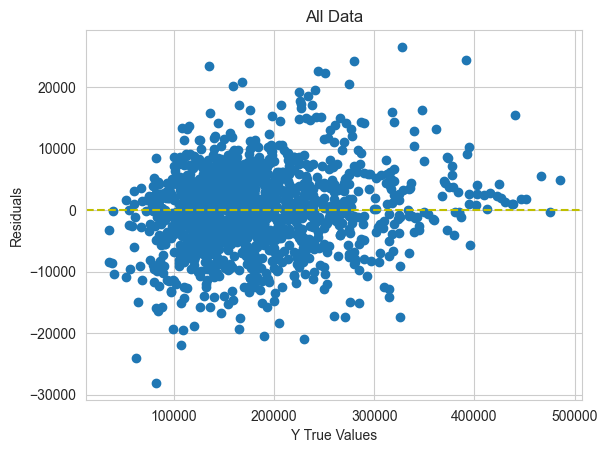

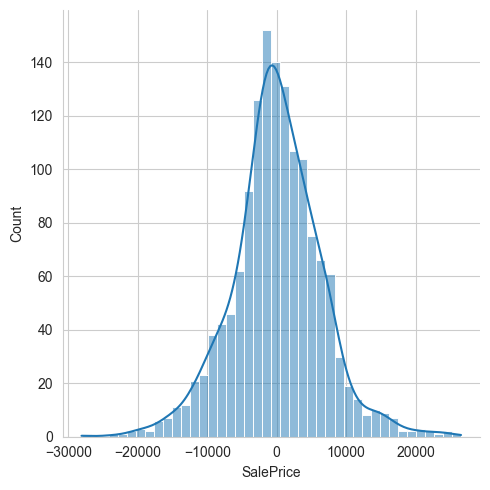

In [37]:
final_scores = reg_score_table(xgbr_final, X, X, y, y).drop('Test', axis=1)
html_table(final_scores)
residuals = y - xgbr_final.predict(X)
residual_plot(y, residuals, title='All Data')
sns.displot(residuals, kde=True)
plt.show()